In [1]:
import os, random, cv2
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import binarize

WIDTH = 140
HEIGHT = 48

CAPTCHA_FOLDER = "captcha/"
PROCESSED_FOLDER = "processed/"

filename = random.choice(os.listdir(CAPTCHA_FOLDER))
img = cv2.imread(CAPTCHA_FOLDER + filename)

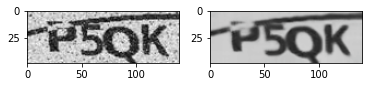

In [2]:
dst = cv2.fastNlMeansDenoisingColored(img, None, 30, 30, 7, 21)
plt.subplot(121)
plt.imshow(img)
plt.subplot(122)
plt.imshow(dst)
plt.show()

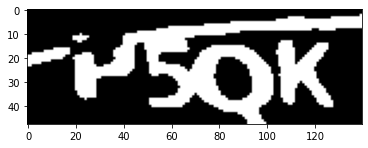

In [3]:
ret, thresh = cv2.threshold(dst, 127, 255, cv2.THRESH_BINARY_INV)
plt.imshow(thresh)
plt.show()

In [4]:
imgarr = cv2.cvtColor(thresh, cv2.COLOR_BGR2GRAY)
imgarr[:, 14:WIDTH - 7] = 0
imagedata = np.where(imgarr == 255)

In [5]:
imgarr.shape

(48, 140)

In [6]:
X = np.array([imagedata[1]])
Y = HEIGHT - imagedata[0]

In [7]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_reg = PolynomialFeatures(degree = 2)
X_ = poly_reg.fit_transform(X.T)
regr = LinearRegression()
regr.fit(X_, Y)

LinearRegression()

In [8]:
X2 = np.array([[i for i in range(0, WIDTH)]])

In [9]:
X2_ = poly_reg.fit_transform(X2.T)

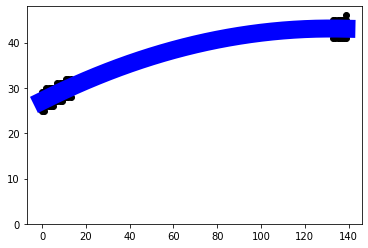

In [10]:
plt.scatter(X, Y, color = "black")
plt.ylim(ymin = 0)
plt.ylim(ymax = HEIGHT)
plt.plot(X2.T, regr.predict(X2_), color = "blue", linewidth = 18)

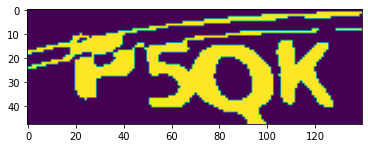

In [11]:
newimg = cv2.cvtColor(thresh, cv2.COLOR_BGR2GRAY)
offset = 4
for ele in np.column_stack([regr.predict(X2_).round(2), X2[0]]):
    pos = HEIGHT - int(ele[0])
    newimg[pos - offset:pos + offset, int(ele[1])] = 255 - newimg[pos - offset:pos + offset, int(ele[1])]

plt.imshow(newimg)
plt.show()

(140, 140)


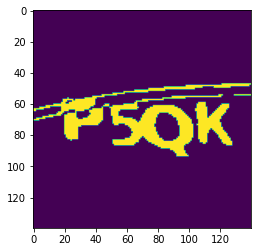

In [12]:
size = (WIDTH - HEIGHT) // 2
padding = cv2.copyMakeBorder(newimg, size, size, 0, 0, cv2.BORDER_CONSTANT, value = [0,0,0]) 
print(padding.shape)

plt.imshow(padding)
plt.show()

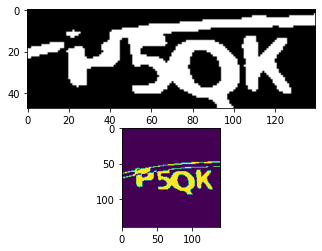

In [13]:
plt.subplot(211)
plt.imshow(thresh)
plt.subplot(212)
plt.imshow(padding)
plt.show()

In [14]:
cv2.imwrite(PROCESSED_FOLDER + filename, padding)

True